# Decision Trees, Random Forest and Gradient Boosting

We will be handling Decision Trees, Random Forest and  Gradient Boosting TOGETHER because they are similar and we are using the same dataset, similar modelling and are hoping to compare both methods. So there will be only 1 section.

## Introduction

**Problem Statement:** The problem is taken directly from Kaggle. Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers.

Source: https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

**ML Model:** I will be using a Decision Tree, Random Forest and Gradient Boosting model to solve this problem 3 differet ways. Decision trees are used to solve classification problems and categorize objects depending on their learning features. They can also be used for regression problems or as a method to predict continuous outcomes from unforeseen data. In our case, we have a classification problem and thus we will use Decision Trees.There may be other models which might perform better but the goal of the assignment is to study decision trees and random forest. Random Forest is based of multiple decision trees and hence, the introduction stays on the same lines.

**Dataset Description:** The dataset which we are using is taken from Kaggle and the schema has been provided.

| Variable | Description |
|------|------|
| Loan_ID | Unique Loan ID |
| Gender | Male/ Female |
| Married | Applicant married (Y/N) |
| Dependents | Number of dependents |
| Education | Applicant Education (Graduate/ Under Graduate) |
| Self_Employed | Self employed (Y/N) |
| ApplicantIncome | Applicant income |
| CoapplicantIncome | Coapplicant income |
| LoanAmount | Loan amount in thousands |
| Loan_Amount_Term | Term of loan in months |
| Credit_History | credit history meets guidelines |
| Property_Area | Urban/ Semi Urban/ Rural |
| Loan_Status | Loan approved (Y/N) |

We can see there are total 13 columns including target variable, all of them are self explanatory hence we will not be explaining each in more detiail.

The "Loan ID" is just the index column hence we can ignore it and drop it. Very obviosuly, "Loan Approved" is the Target Variable and all the other columns are hence the "Features".

## Implementation

In [ ]:
#Importing pandas to read dataset
import pandas as pd
import numpy as np

train_df = pd.read_csv('/content/sample_data/loan-train.csv')
#Getting info of type and number of values from the dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


We observe that there are many columns which have null values. Let us find basic distribution/relationship of our features and the approval status. Then we can decide how to handle these null values. We will also do some data processing in the process. Please follow the comments for the same.

In [ ]:
# Dropping Loan ID
train_df = train_df.drop(columns=['Loan_ID'])

# Distinguishing between Categorical and Numerical Columns
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(categorical_columns)
print(numerical_columns)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


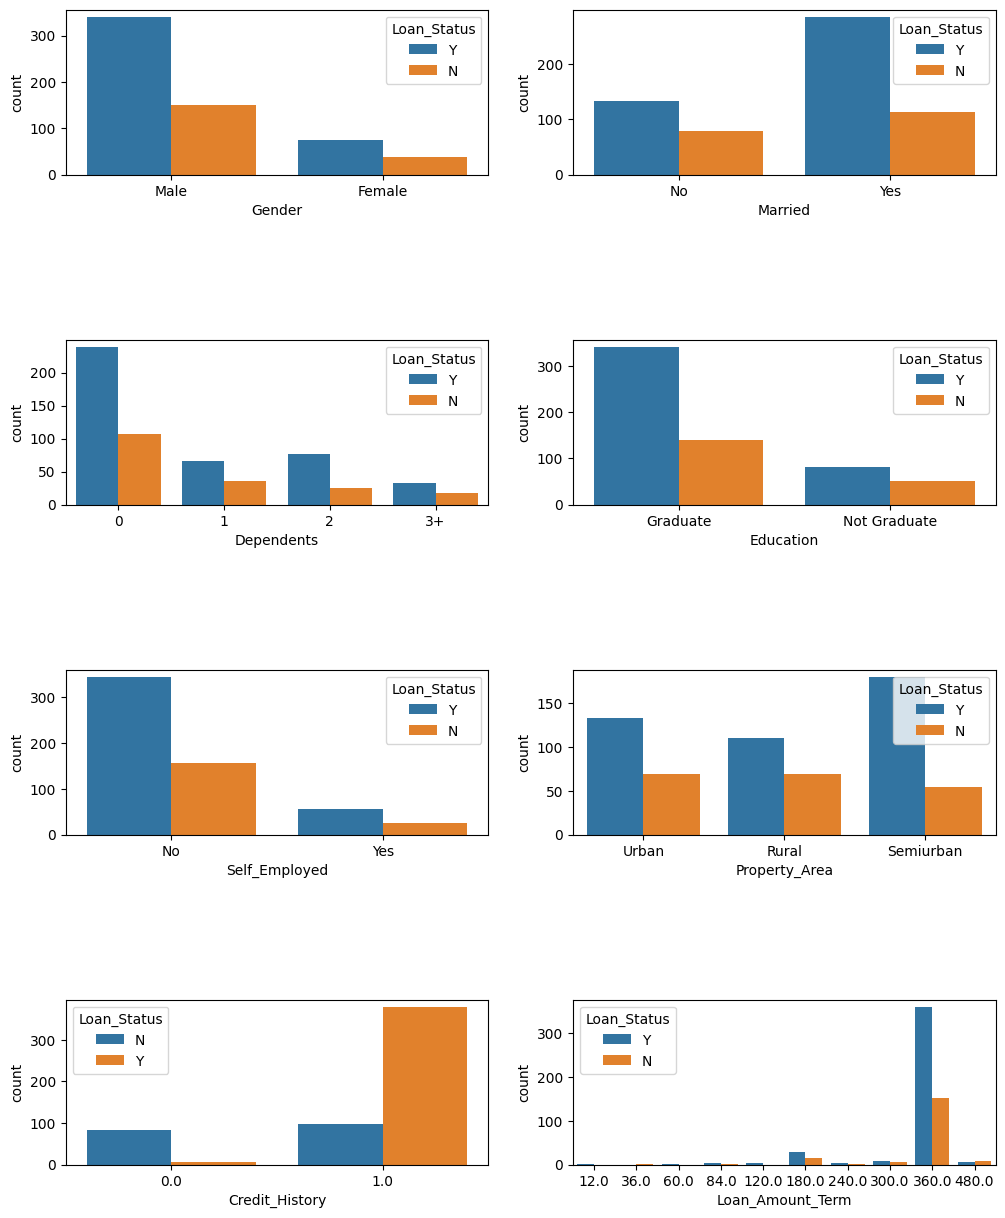

In [ ]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Visualising Relationship between each categorical variable and the target varible
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=train_df,hue='Loan_Status',ax=axes[row,col])

plt.subplots_adjust(hspace=1)

In [ ]:
count_value1 = train_df['Loan_Status'].value_counts()['Y']
count_value2 = train_df['Loan_Status'].value_counts()['N']

print("Number of Loan Approvals:", count_value1)
print("Number of Loan Rejections:", count_value2)

Number of Loan Approvals: 422
Number of Loan Rejections: 192


Quickly analyzing the plots gives us the following things about the dataset:
1. Loan Approval Status: About 2/3rd of applicants have been granted loan.
2. Sex: There are more Men than Women (approx. 3x)
3. Martial Status: 2/3rd of the population in the dataset is Marred; Married applicants are more likely to be granted loans.
4. Dependents: Majority of the population have zero dependents and are also likely to accepted for loan.
5. Education: About 5/6th of the population is Graduate and graduates have higher propotion of loan approval
6. Employment: 5/6th of population is not self employed.
7. Property Area: More applicants from Semi-urban and also likely to be granted loans.
8. Applicant with credit history are far more likely to be accepted.
9. Loan Amount Term: Majority of the loans taken are for 360 Months (30 years).

Before feeding our data into the model, we need to pre-process the dataset. We will be taking care of the following things.
1. Converting Categorical Features to Numerical Features
2. Handling missing/NaN values

In [ ]:
#Converting all the categorical variables into numerical format for easy input and processing
#The mapping function does this task for us. It's functionality is straightforward.
train_df['Gender'] = train_df['Gender'].map({"Male" : 1, "Female" : 0})
train_df['Married'] = train_df['Married'].map({"Yes" : 1, "No" : 0})
train_df['Education'] = train_df['Education'].map({"Graduate" : 1, "Not Graduate" : 0})
train_df['Dependents'].replace('3+', 3, inplace=True)
train_df['Self_Employed'] = train_df['Self_Employed'].map({"Yes" : 1, "No" : 0})
train_df['Property_Area'] = train_df['Property_Area'].map({"Semiurban" : 1, "Urban" : 2, "Rural" : 3})
train_df['Loan_Status'] = train_df['Loan_Status'].map({"Y" : 1, "N" : 0})

train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,1.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [ ]:
#Checking existance of NaN values
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Let us replace all NaN values with appropriate metrics
nan_columns = ['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']

# Replace NaN values in each column with appropriate metrics
train_df[nan_columns] = train_df[nan_columns].fillna({
    'Gender': train_df['Gender'].mode()[0],
    'Married': train_df['Married'].mode()[0],
    'Dependents': train_df['Dependents'].mode()[0],
    'Self_Employed': train_df['Self_Employed'].mode()[0],
    'Credit_History': 1,  # Assuming 1 is the mode or most frequent value
    'LoanAmount': train_df['LoanAmount'].mean(),
    'Loan_Amount_Term': train_df['Loan_Amount_Term'].mean()
})

train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,2900,0.0,71.000000,360.0,1.0,3,1
610,1.0,1.0,3,1,0.0,4106,0.0,40.000000,180.0,1.0,3,1
611,1.0,1.0,1,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2,1,0.0,7583,0.0,187.000000,360.0,1.0,2,1


Now that we have a properly processed dataset, let us move on to implementing the Decision Tree and Random Forest models.

While training a Machine Learning model, we split our 'Supervised' Dataset into a Training Dataset and a Testing Dataset. We use the training dataset to 'train' our model and the testing dataset to verify how accurate our trained model is at predicting on unknown data (The training data is unknown to the model as we have not used it to train the paramaters).

  1. X_train: This will be the training set of features (size = 80% of training set).
  2. X_test: This will be the testing set of features (size = 20% of testing set).
  3. y_train: This will be the corresponding training set of target values (size = 80% of training set).
  4. y_test: This will be the corresponding testing set of target values (size = 20% of testing set).

We can use the train_test_split function which randomly splits the data into training and testing sets. By default, 80% of the data will be used for training (X_train and y_train), and 20% will be used for testing (X_test and y_test), as specified by the test_size=0.2 argument. It is a standard practise to use an 80-20 split. The motivation behind this is loosely the Pareto principle.The Pareto principle is not a mathematically guaranteed property, but many observed phenomena follow the Pareto principle. As it is seen ubiquitous in nature, we try to emulate the same conjecture with our model. After all, we are trying to emulate 'intelligence'.

**Scaling the Data:** Data scaling is the process of transforming the values of the features of a dataset till they are within a specific range, e.g. 0 to 1 or -1 to 1. This is to ensure that no single feature 'dominates' the distance calculations in an algorithm, and can help to improve the performance of the algorithm.

Scaling your data in machine learning is important because many algorithms use the L-2 norm between two data points in their computations, which is sensitive to the scale of the variables. If one variable is on a much larger scale than another, that variable will dominate the distance calculation, and the algorithm will be affected by that variable more than the other irrespective of the importance of that variable in being a predictor. Scaling the data can help to balance the impact of all variables on the distance calculation and can help to improve the performance of the algorithm.

Source: https://medium.com/codex/why-scaling-your-data-is-important-1aff95ca97a2

Although Decision Trees, Random Forest or Gradient Boosting do not necessarily need this step, it is considered a good practise. Usually we use the StandardScaler object from scikit-learn to standardize the features in both the training and testing sets. Standardization (or Z-score normalization) is a common preprocessing step in machine learning that helps to scale features to have zero mean and unit variance. As mentioned above, Standardizing features is important because it helps to ensure that all features contribute equally to the learning process, and it can improve the performance of certain machine learning algorithms. Keep in mind, we need to scale features on both - the training AND testing sets.

In [ ]:
#Splitting the Dataset into feature space(X) and labels(y)
#X will have 11 columns and y will have 1 column. Each has 614 samples.
X = train_df.drop(columns=['Loan_Status'])
y = train_df['Loan_Status']

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

#performing the 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that we have split our datasets, let us fir these to the models.

In [ ]:
# Initialising and fitting the data to the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Initialising and fitting the data to the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialising and fitting the data to the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Decision Tree prediction metrics
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)
print(classification_report(y_test, dt_pred))

Decision Tree Accuracy: 0.6991869918699187
              precision    recall  f1-score   support

           0       0.57      0.53      0.55        43
           1       0.76      0.79      0.77        80

    accuracy                           0.70       123
   macro avg       0.67      0.66      0.66       123
weighted avg       0.69      0.70      0.70       123



In [ ]:
# Random Forest prediction metrics
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.7723577235772358
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [ ]:
# Gradient Boosting prediction metrics
gb_pred = gb_model.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)
print(classification_report(y_test, gb_pred))

Gradient Boosting Accuracy: 0.7642276422764228
              precision    recall  f1-score   support

           0       0.79      0.44      0.57        43
           1       0.76      0.94      0.84        80

    accuracy                           0.76       123
   macro avg       0.77      0.69      0.70       123
weighted avg       0.77      0.76      0.74       123



(At the time of writing the notebook, I got these values. Multiple iterations have been performed which can cause the values to be different if you run the code. Please keep this in mind.)

**Decision Tree:**
1. Accuracy: The Decision Tree model achieved an accuracy of approximately 64% on the test set.
2. Precision: Precision measures the accuracy of the 'positive' predictions. In this case, for class 'Y' (loan approval), the precision is 73%, meaning that when the model predicts a positive outcome, it is correct 73% of the time.
3. Recall: Recall, also known as sensitivity or true positive rate, is the proportion of actual positive instances that were correctly predicted by the model. For class 'Y', the recall is 74%, indicating that the model captured 74% of the actual positive instances.
4. F1-Score: The F1-score is the harmonic mean of precision and recall. It is useful when there is an uneven class distribution. The weighted average F1-score is around 73%.

**Random Forest:**
1. Accuracy: The Random Forest model achieved an accuracy of approximately 78% on the test set.
2. Precision: The precision for class 'Y' is 76%, similar to the Decision Tree. However, for class 'N' (loan rejection), the precision is lower at 67%.
3. Recall: The recall for class 'Y' is 96%, indicating that the model captures a high proportion of actual positive instances. For class 'N', the recall is 44%.
4. F1-Score: The weighted average F1-score is around 85%.

**Gradient Boosting:**
1. Accuracy: The Gradient Boosting model achieved an accuracy of approximately 75% on the test set.
2. Precision: The precision for class 'Y' is 75%, and for class 'N', it is 75%.
3. Recall: The recall for class 'Y' is 93%, and for class 'N', it is 42%.
4. F1-Score: The weighted average F1-score is around 83%.

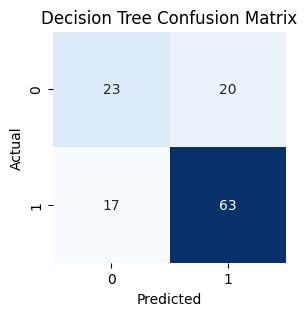

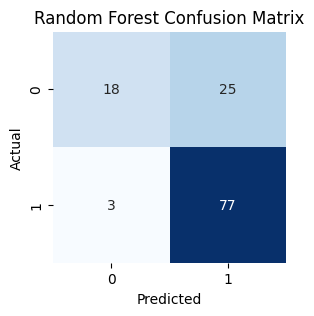

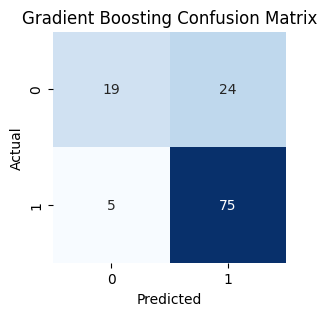

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrix for Decision Tree
plot_confusion_matrix(y_test, dt_pred, title='Decision Tree Confusion Matrix')

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_pred, title='Random Forest Confusion Matrix')

# Plot confusion matrix for Gradient Boosting
plot_confusion_matrix(y_test, gb_pred, title='Gradient Boosting Confusion Matrix')

**Interpreting Confusion Matrices:**
1. True Positives (TP): The number of instances correctly predicted as positive (loan approval).
2. True Negatives (TN): The number of instances correctly predicted as negative (loan rejection).
3. False Positives (FP): The number of instances incorrectly predicted as positive (false alarms).
4. False Negatives (FN): The number of instances incorrectly predicted as negative (missed opportunities).

**General Observations:**
1. Decision Tree has a relatively balanced number of false positives and false negatives.
2. Random Forest and Graident Boosting both have a higher number of false positives compared to false negatives.
3. Random Forest and Graident Boosting both have a higher number of true positives than Decision Trees.

Along with a labelled training dataset, there was also an unlabelled testing dataset provided. Although we cannot measure the accuracy due to absence of lables, we can try and predict the results. Let us do that using the following.

In [ ]:
#Reading testing dataset
test_df = pd.read_csv('/content/sample_data/loan-test.csv')
test_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
# Extracting basic information regarding the testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [ ]:
#Dropping loadn_ID column
test_df = test_df.drop(columns=['Loan_ID'])

In [ ]:
#Converting all string categorical values to numerical values
test_df['Gender'] = test_df['Gender'].map({"Male" : 1, "Female" : 0})
test_df['Married'] = test_df['Married'].map({"Yes" : 1, "No" : 0})
test_df['Education'] = test_df['Education'].map({"Graduate" : 1, "Not Graduate" : 0})
test_df['Dependents'].replace('3+', 3, inplace=True)
test_df['Self_Employed'] = test_df['Self_Employed'].map({"Yes" : 1, "No" : 0})
test_df['Property_Area'] = test_df['Property_Area'].map({"Semiurban" : 1, "Urban" : 2, "Rural" : 3})

test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.0,2
363,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.0,2
364,1.0,0,0,1,0.0,3250,1993,126.0,360.0,NaN,1
365,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.0,3


In [ ]:
#Let us replace all NaN values with appropriate metrics
test_nan_columns = ['Gender','Married','Dependents','Self_Employed','Credit_History','LoanAmount','Loan_Amount_Term']

# Replace NaN values in each column with appropriate metrics
test_df[nan_columns] = test_df[nan_columns].fillna({
    'Gender': test_df['Gender'].mode()[0],
    'Married': test_df['Married'].mode()[0],
    'Dependents': test_df['Dependents'].mode()[0],
    'Self_Employed': test_df['Self_Employed'].mode()[0],
    'Credit_History': test_df['Credit_History'].mode()[0],
    'LoanAmount': test_df['LoanAmount'].mean(),
    'Loan_Amount_Term': test_df['Loan_Amount_Term'].mean()
})

test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,1.0,2
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.0,2
363,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.0,2
364,1.0,0,0,1,0.0,3250,1993,126.0,360.0,1.0,1
365,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.0,3


In [ ]:
#Prediction using Decision Tree
dt_pred = dt_model.predict(test_df)

#Prediction using Random Forest
rf_pred = rf_model.predict(test_df)

#Prediction using Gradient Boosting
gb_pred = gb_model.predict(test_df)

In [ ]:
#Adding columns corresponding to respective predictions
test_df['DT Pred'] = dt_pred
test_df['RF Pred'] = rf_pred
test_df['GB Pred'] = gb_pred
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,DT Pred,RF Pred,GB Pred
0,1.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,2,1,1,1
1,1.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,2,1,1,1
2,1.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,2,1,1,1
3,1.0,1,2,1,0.0,2340,2546,100.0,360.0,1.0,2,1,1,1
4,1.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3,0,1.0,4009,1777,113.0,360.0,1.0,2,0,1,1
363,1.0,1,0,1,0.0,4158,709,115.0,360.0,1.0,2,1,1,1
364,1.0,0,0,1,0.0,3250,1993,126.0,360.0,1.0,1,1,1,1
365,1.0,1,0,1,0.0,5000,2393,158.0,360.0,1.0,3,1,1,1


## Analysis

We have calculated and portrayed different metrics. Let us also calculate the 'cross validation score' of the dataset with respect to different models.

What is cross validation? Cross-validation is a technique used to assess how well a statistical model generalizes to an independent dataset. Instead of splitting the dataset into a single training and testing set, cross-validation involves partitioning the original dataset into multiple subsets or folds. The model is trained on several of these folds and tested on the remaining fold. This process is repeated multiple times, each time with a different fold held out for testing. This allows for a more robust estimation of the model's performance. 'cross_val_score returns an array of scores obtained for each fold of the cross-validation process.

Decision Tree Cross-Validation Scores: [0.71544715 0.63414634 0.69105691 0.74796748 0.74590164]
Mean Decision Tree Cross-Validation Score: 0.7069039051046249


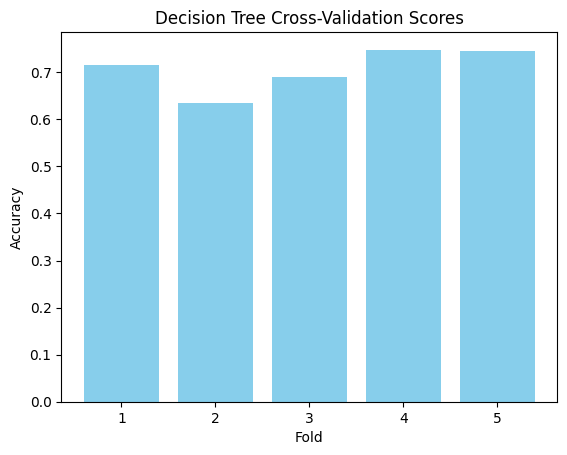

Random Forest Cross-Validation Scores: [0.78861789 0.75609756 0.77235772 0.82113821 0.80327869]
Mean Random Forest Cross-Validation Score: 0.7882980141276823


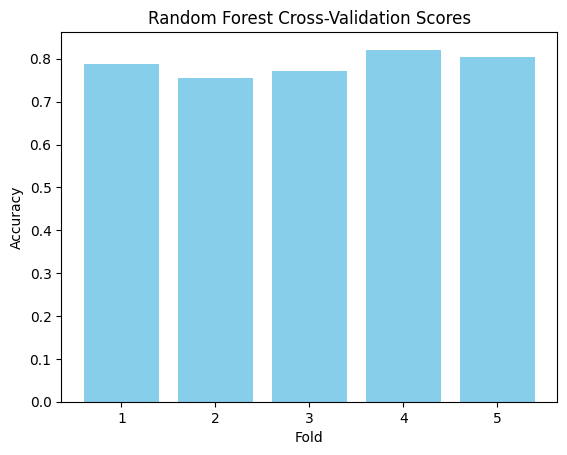

Gradient Boosting Cross-Validation Scores: [0.79674797 0.72357724 0.78861789 0.82926829 0.78688525]
Mean Gradient Boosting Cross-Validation Score: 0.7850193256030921


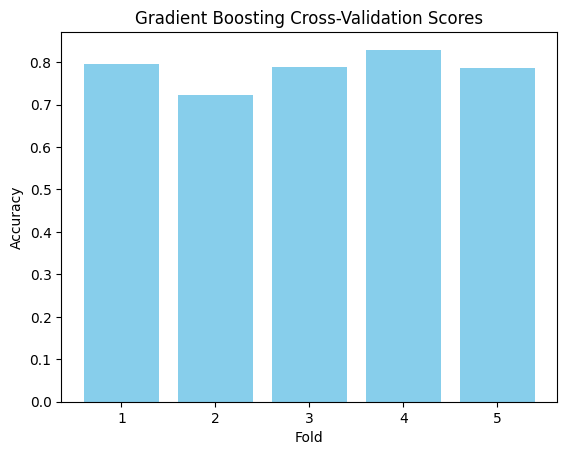

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Function to calculate cross-validation scores and plot results
def cross_val_and_plot(model, X, y, model_name):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{model_name} Cross-Validation Scores:', cv_scores)
    print(f'Mean {model_name} Cross-Validation Score:', np.mean(cv_scores))

    # Plotting
    plt.bar(range(1, 6), cv_scores, color='skyblue')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.title(f'{model_name} Cross-Validation Scores')
    plt.show()

# Cross-validation for Decision Tree
cross_val_and_plot(dt_model, X, y, 'Decision Tree')

# Cross-validation for Random Forest
cross_val_and_plot(rf_model, X, y, 'Random Forest')

# Cross-validation for Gradient Boosting
cross_val_and_plot(gb_model, X, y, 'Gradient Boosting')

**Model Performance:**
1. Decision Tree: The cross-validation mean score was around 70%.
2. Random Forest: The mean cross-validation score was about 78%.
3. Gradient Boosting: The mean cross-validation score was around 78%.

**Model Comparison:**
1. Among the models evaluated, Gradient Boosting and Random Forest exhibited the highest mean cross-validation scores, suggesting better generalization performance.
2. Decision Tree had a lower mean cross-validation score compared to the other models meaning not great generalization to unseen datasets as compared to the other models.

Question: Is the model a good fit?
Answer: Given that we do not have an immense amount of data and we have still managed to get an accuracy of around 70% for each of the models for a task as subjective as loan prediction, it is a fair assumption to say that the models have performed not great but not poorly.

Question: Why the model do a good or a bad job for this specific problem and dataset?
Answer: Decision trees, random forests, and gradient boosting are known to work well with categorical datasets for several reasons. As our dataset is categorical, we can say that it has done a good job classifying information in our dataset.
*   Handling Categorical Variables: These algorithms can naturally handle categorical variables without requiring one-hot encoding or other preprocessing techniques. Decision trees split the data based on categorical variables by creating branches for each category, and they select the split that maximizes information gain or reduces impurity.
*   Non-linearity: Decision trees, random forests, and gradient boosting are capable of capturing non-linear relationships between features and the target variable. Categorical variables often exhibit non-linear relationships with the target, and decision trees can represent these relationships effectively by creating complex decision boundaries.
*   Feature Importance: These algorithms provide feature importance scores, which can be useful for understanding the importance of categorical variables in predicting the target. Decision trees and their ensemble counterparts can quantify the contribution of each categorical variable to the overall prediction, helping users interpret the model.



Let us try to understand the basic pros and cons of all three models

**Decision Tree:**

Pros:
1. Interpretability: Decision trees are easy to interpret and understand. The rules generated by the tree can be visualized.
2. No Assumptions About Data Distribution: Decision trees do not make assumptions about the distribution of data.

Cons:
1. Overfitting: Decision trees can easily overfit the training data, capturing noise in the data rather than the underlying patterns.
2. Variance: Decision trees are sensitive to variations in the training data, leading to high variance.

**Random Forest:**

Pros:
1. Ensemble Method: Random Forest is an ensemble method that combines multiple decision trees, reducing overfitting and increasing robustness.
2. Feature Importance: Random Forest provides a feature importance score, helping identify the most influential features.

Cons:
1. Complexity: Random Forest models can be computationally expensive and may require more resources.
2. Less Interpretability: While Random Forest can provide feature importance, the overall model is less interpretable compared to a single decision tree.

**Gradient Boosting:**

Pros:
1. High Accuracy: Gradient Boosting often provides high predictive accuracy.
2. Handles Non-linearity: It can capture complex relationships in the data and handle non-linearity well.

Cons:
1. Complexity: Similar to Random Forest, Gradient Boosting can be computationally expensive and may require more tuning.
2. Sensitivity to Noisy Data: Like decision trees, Gradient Boosting can be sensitive to noisy data and may overfit.